# ДЗ 3

**Задание 1.1**

``` mysql
SELECT title, premiered
FROM titles
WHERE premiered < 2018
```

**Задание 1.2**

``` mysql
SELECT title, rating, votes
FROM titles
  JOIN rating ON titles.title_id = rating.title_id
ORDER BY votes DESC -- упорядочиваем по колчиеству оценок в порядке убывания
LIMIT 50 -- выводим первые 50
```

**Задание 1.3**

``` mysql
SELECT title, 
    genre_name, 
    rating, 
    premiered
FROM titles
    JOIN rating ON titles.title_id = rating.title_id
    JOIN genre_types ON film_genres.genre_id = genre_types.id
    JOIN film_genres ON titles.title_id = film_genres.title_id
WHERE rating >= 7 AND titles.premiered = 2019 AND genre_types.genre_name = "Comedy"
ORDER BY votes DESC
LIMIT 10
```

**Задание 1.4**

``` mysql
SELECT title, premiered
FROM titles
    JOIN people ON crew.person_id = people.person_id
    JOIN crew ON titles.title_id = crew.title_id
WHERE people.name = "Ryan Gosling" -- фильтруем по актеру
ORDER BY premiered ASC -- от старых фильмов к новым
```

**Задание 1.5**

``` mysql
SELECT premiered, COUNT(*)
FROM titles
    JOIN genre_types ON film_genres.genre_id = genre_types.id
    JOIN film_genres ON titles.title_id = film_genres.title_id
WHERE genre_name = "Fantasy" -- оставляем один жанр
GROUP BY premiered -- группируем по годам, получается количество фильмов жанра для каждого года
```

**Задание 1.6**

``` mysql
SELECT DISTINCT
name,
(CASE 
    WHEN people.died == NULL THEN 2023 - people.born
    ELSE people.died - people.born END) AS age 
FROM titles
    JOIN people ON crew.person_id = people.person_id
    JOIN crew ON titles.title_id = crew.title_id
WHERE age >= 100
ORDER BY age DESC 
LIMIT 10 -- если надо вывести топ 10 долгожителей, а не список всех
```

**Задание 1.7**

In [ ]:
import sqlite3
import pandas as pd

con = sqlite3.connect('imdb_small_indexed.db')
cur = con.cursor()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Создаем запрос для комедий: выводим количество комедий для каждого округленного рейтинга и записываем в датафрейм.

In [37]:
com_query = """
SELECT
    ROUND(rating) AS rounded_rating,
	COUNT(*) as number,
    genre_name
FROM titles
    JOIN rating ON titles.title_id = rating.title_id
    JOIN genre_types ON film_genres.genre_id = genre_types.id
    JOIN film_genres ON titles.title_id = film_genres.title_id
WHERE genre_types.genre_name ="Comedy"
GROUP BY rounded_rating
"""

In [38]:
cur.execute(com_query)
df_com = pd.read_sql_query(com_query, con=con)
print(df_com)

   rounded_rating  number genre_name
0             1.0     138     Comedy
1             2.0     717     Comedy
2             3.0    2478     Comedy
3             4.0    6503     Comedy
4             5.0   14546     Comedy
5             6.0   25271     Comedy
6             7.0   24277     Comedy
7             8.0   12327     Comedy
8             9.0    1895     Comedy
9            10.0      96     Comedy


Так же с документалками

In [ ]:
doc_query = """
SELECT
    ROUND(rating) AS rounded_rating,
	COUNT(*) as number,
    genre_name
FROM titles
    JOIN rating ON titles.title_id = rating.title_id
    JOIN genre_types ON film_genres.genre_id = genre_types.id
    JOIN film_genres ON titles.title_id = film_genres.title_id
WHERE genre_types.genre_name ="Documentary"
GROUP BY rounded_rating
"""

In [84]:
cur.execute(doc_query)
df_doc = pd.read_sql_query(doc_query, con=con)
print(df_doc)

   rounded_rating  number   genre_name
0             1.0      34  Documentary
1             2.0     115  Documentary
2             3.0     282  Documentary
3             4.0     643  Documentary
4             5.0    1724  Documentary
5             6.0    5992  Documentary
6             7.0   16237  Documentary
7             8.0   15334  Documentary
8             9.0    5075  Documentary
9            10.0     213  Documentary


Создаем точечный график для категорий комедии и документалки, где по ось Х это рейтинг, а Y - количество фильмов соответственно.

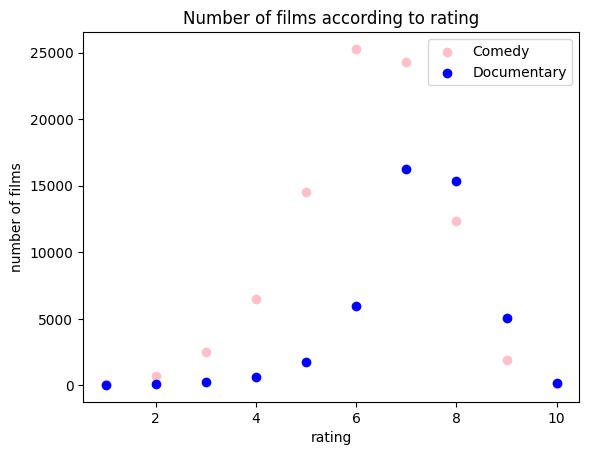

In [98]:
plt.scatter(df_com['rounded_rating'], df_com['number'], color='pink', label="Comedy")
plt.scatter(df_doc['rounded_rating'], df_doc['number'], color='blue', label="Documentary")
plt.title('Number of films according to rating')
plt.ylabel('number of films')
plt.xlabel('rating')
plt.legend(loc='best')
plt.show()

**Задание 1.8**

Создаем таблицу

In [89]:
cur.execute("""
CREATE TABLE centenarians (
    person_id INT, 
    name TEXT,
    age INT,
    PRIMARY KEY (person_id)
)
""")

In [90]:
con.commit()

Запрос для содержания новой таблицы

In [91]:
cent_query = '''
SELECT DISTINCT
people.person_id,
name,
(CASE 
    WHEN people.died == NULL THEN 2023 - people.born
    ELSE people.died - people.born END) AS age 
FROM titles
    JOIN people ON crew.person_id = people.person_id
    JOIN crew ON titles.title_id = crew.title_id
WHERE age >= 100
ORDER BY age DESC
'''

Сделаем запрос и срез

In [93]:
cur.execute(cent_query)
dt = cur.fetchall()

dt[:10]

[(130625, 'Jeanne Louise Calment', 122),
 (4304013, 'Fakir Lalon Shah', 118),
 (275946, 'Gustave Field', 116),
 (1919360, 'Maria De Jesus', 116),
 (2662909, 'Henry Allingham', 113),
 (756226, 'Frederica Sagor Maas', 112),
 (41807, 'Germaine Auger', 112),
 (2122051, 'Harry Patch', 111),
 (2304799, 'Aliza Sommer-Herz', 111),
 (7407296, 'Vera Price', 111)]

Вставляем данные из запроса в таблицу

In [94]:
cur.executemany("INSERT INTO centenarians VALUES (?, ?, ?)", dt)
con.commit()

Протестируем

In [95]:
test_query = '''
SELECT *
FROM centenarians
ORDER BY age >= 100
LIMIT 10
'''

In [97]:
cur.execute(test_query)
res = cur.fetchall()
print(res)

[(130625, 'Jeanne Louise Calment', 122), (4304013, 'Fakir Lalon Shah', 118), (275946, 'Gustave Field', 116), (1919360, 'Maria De Jesus', 116), (2662909, 'Henry Allingham', 113), (756226, 'Frederica Sagor Maas', 112), (41807, 'Germaine Auger', 112), (2122051, 'Harry Patch', 111), (2304799, 'Aliza Sommer-Herz', 111), (7407296, 'Vera Price', 111)]
